# Problemas de prueba de hipótesis

In [1]:
from scipy.stats import ttest_ind, t
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [24]:
#  1. Definir las hipótesis: Comparación de dietas.
# Hipótesis nula (H0): No hay diferencia significativa entre las pérdidas de peso promedio de las dos dietas.
# Hipótesis alternativa (H1): Existe una diferencia significativa en la pérdida de peso promedio entre las dos dietas.
# 2. Elegir el nivel de significación

alpha = 0.05        # Nivel de significancia (5%)

# 3. Verificar hipótesis
# Datos:

diet_1 = np.array([2, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
diet_2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

# Calculos descriptivos

mean_1 = np.mean(diet_1)
mean_2 = np.mean(diet_2)

print(f'Promedio Dieta 1: {mean_1:.3f} kg')
print(f'Promedio Dieta 2: {mean_2:.3f} kg')

# Prueba t de Student para muestras independientes

t_stat, p_value = ttest_ind(diet_1, diet_2)

print(f'Estadistico t = {t_stat:.3f}')
print(f'Valor p = {p_value:.3f}')

# 4. Decisión estadística

if p_value < alpha:
    print("Rechazamos H0:\nHay evidencia de que las dietas tienen efectos diferentes en la pérdida de peso")
else:
    print("No rechazamos H0:\nNo hay evidencia suficiente para afirmar que las dietas tienen efectos diferentes en la pérdida de peso")

# Nivel de significancia

a = 0.001
b = 0.01
c = 0.05

if p_value < a:
    significance = '***'
    print(f'{significance} p < {a}')
elif p_value < b:
    significance = '**'
    print(f'{significance} p < {b}')
elif p_value < c:
    significance = '*'
    print(f'{significance} p < {c}')
else:
    significance = 'ns'
    print(f'{significance} (p ≥ {c}) ')



Promedio Dieta 1: 2.543 kg
Promedio Dieta 2: 3.029 kg
Estadistico t = -3.538
Valor p = 0.004
Rechazamos H0:
Hay evidencia de que las dietas tienen efectos diferentes en la pérdida de peso
** p < 0.01


/tmp/ipykernel_643/2116756435.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diet_1, diet_2], labels=['Dieta 1', 'Dieta 2'])


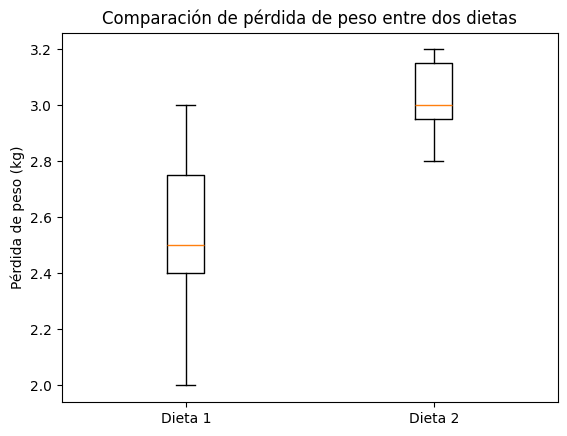

In [21]:
# Visualización

plt.boxplot([diet_1, diet_2], labels=['Dieta 1', 'Dieta 2'])
plt.title('Comparación de pérdida de peso entre dos dietas')
plt.ylabel('Pérdida de peso (kg)')

plt.show()


##### Conclusión:
En la gráfica se observa que la Dieta 2 logra una mayor pérdida de peso promedio en comparación con la Dieta 1, y esta diferencia es estadísticamente significativa (** _p_ < 0.01).

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [32]:
# 1. Definir las hipótesis: Comparación de tres tipos de fertilizantes.
# Hipótesis nula: No existen diferencias significativas en el rendimiento promedio entre los fertilizantes.
# Hipótesis alternativa: Al menos un fertilizante tiene un rendimiento promedio significativamente diferente.

# 2. Nivel de significancia

alpha = 0.05

# 3. Verificar hipótesis
# Datos 

fertilizante_1 = np.array([20, 21, 20, 19, 20])
fertilizante_2 = np.array([22, 21, 23, 22, 21])
fertilizante_3 = np.array([24, 23, 22, 23, 24])


# Estadisticas descriptivas

mean_1 = np.mean(fertilizante_1)
mean_2 = np.mean(fertilizante_2)
mean_3 = np.mean(fertilizante_3)

print(f'Promedio Fertilizante 1: {mean_1:.2f} kg')
print(f'Promedio Fertilizante 2: {mean_2:.2f} kg')
print(f'Promedio Fertilizante 3: {mean_3:.2f} kg')

# Prueba ANOVA de una vía

f_stat, p_value = f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)
print(f'Estadistico f = {f_stat:.3f}')
print(f'Valor p = {p_value:.4f}')

# 4. Decisión estadística

if p_value < alpha:
    print("Rechazamos H0: Existen diferencias significativas entre los rendimientos.")
else:
    print("No rechazamos H0: No hay evidencia suficiente para afirmar diferencias siggnificativas")

# Nivel de significancia

a = 0.001
b = 0.01
c = 0.05

if p_value < a:
    significance = '***'
    print(f'{significance} p < {a}')
elif p_value < b:
    significance = '**'
    print(f'{significance} p < {b}')
elif p_value < c:
    significance = '*'
    print(f'{significance} p < {c}')
else:
    significance = 'ns'
    print(f'{significance} (p ≥ {c}) ')


Promedio Fertilizante 1: 20.00 kg
Promedio Fertilizante 2: 21.80 kg
Promedio Fertilizante 3: 23.20 kg
Estadistico f = 20.316
Valor p = 0.0001
Rechazamos H0: Existen diferencias significativas entre los rendimientos.
*** p < 0.001


In [33]:
# prueba post-hoc de Tukey para identificar qué grupos difieren

data = np.concatenate([fertilizante_1, fertilizante_2, fertilizante_3])
labels = ["F1"] * len(fertilizante_1) + ["F2"] * len(fertilizante_2) + ["F3"] * len(fertilizante_3)

tukey = pairwise_tukeyhsd(data, labels, alpha)
print(tukey)

print("El Fertilizante 3 presenta el mayor rendimiento promedio")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------
El Fertilizante 3 presenta el mayor rendimiento promedio


/tmp/ipykernel_643/2612553548.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fertilizante_1, fertilizante_2, fertilizante_3], labels=["F1", "F2", "F3"])


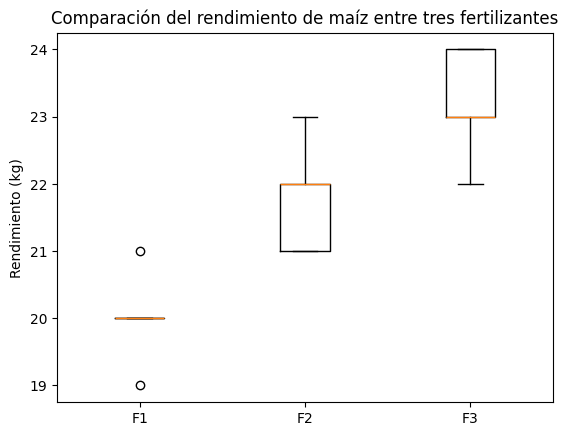

In [31]:
# Visualización con boxplot

plt.boxplot([fertilizante_1, fertilizante_2, fertilizante_3], labels=["F1", "F2", "F3"])
plt.title("Comparación del rendimiento de maíz entre tres fertilizantes")
plt.ylabel("Rendimiento (kg)")
plt.show()

#### Conclusión:
El análisis ANOVA ha revelado diferencias significativas entre al menos uno de los fertilizantes del estudio (*** _p_ < 0.001). 
El análisis post-hoc de Tukey indica que el Fertilizante 3 presenta un rendimiento promedio significativamente mayor respecto a los Fertilizantes 1 y 2.